# LINEAR REGRESSION

In [ ]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the dataset
df = pd.read_excel('Data-linear-regression.xlsx',header=3,skipfooter=8)

In [ ]:
# Load Dataset
data = pd.DataFrame(df)

In [ ]:
data

,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
0,1,192000,15,1800000,5800,50
1,2,190400,15,1790000,6200,50
2,3,191200,15,1780000,6400,60
3,4,177600,25,1778000,6500,60
4,5,176800,25,1750000,6550,60
5,6,178400,25,1740000,6580,70
6,7,180800,25,1725000,8200,75
7,8,175200,30,1725000,8600,75
8,9,174400,30,1720000,8800,75
9,10,173920,30,1705000,9200,80


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   City                             27 non-null     int64
 1   Number of weekly riders          27 non-null     int64
 2   Price per week                   27 non-null     int64
 3   Population of city               27 non-null     int64
 4   Monthly income of riders         27 non-null     int64
 5   Average parking rates per month  27 non-null     int64
dtypes: int64(6)
memory usage: 1.4 KB


In [ ]:
# Retriving statiscal information about data
data.describe()

,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
count,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,14.000000,160026.074074,49.925926,1.680111e+06,11063.259259,107.037037
std,7.937254,21301.097303,27.627921,6.780307e+04,3416.627944,45.346089
min,1.000000,115696.000000,15.000000,1.590000e+06,5800.000000,50.000000
25%,7.500000,149600.000000,27.500000,1.617500e+06,8400.000000,75.000000
50%,14.000000,161600.000000,40.000000,1.695000e+06,11600.000000,100.000000
75%,20.500000,176000.000000,75.000000,1.725000e+06,13888.000000,140.000000
max,27.000000,192000.000000,102.000000,1.800000e+06,16200.000000,200.000000


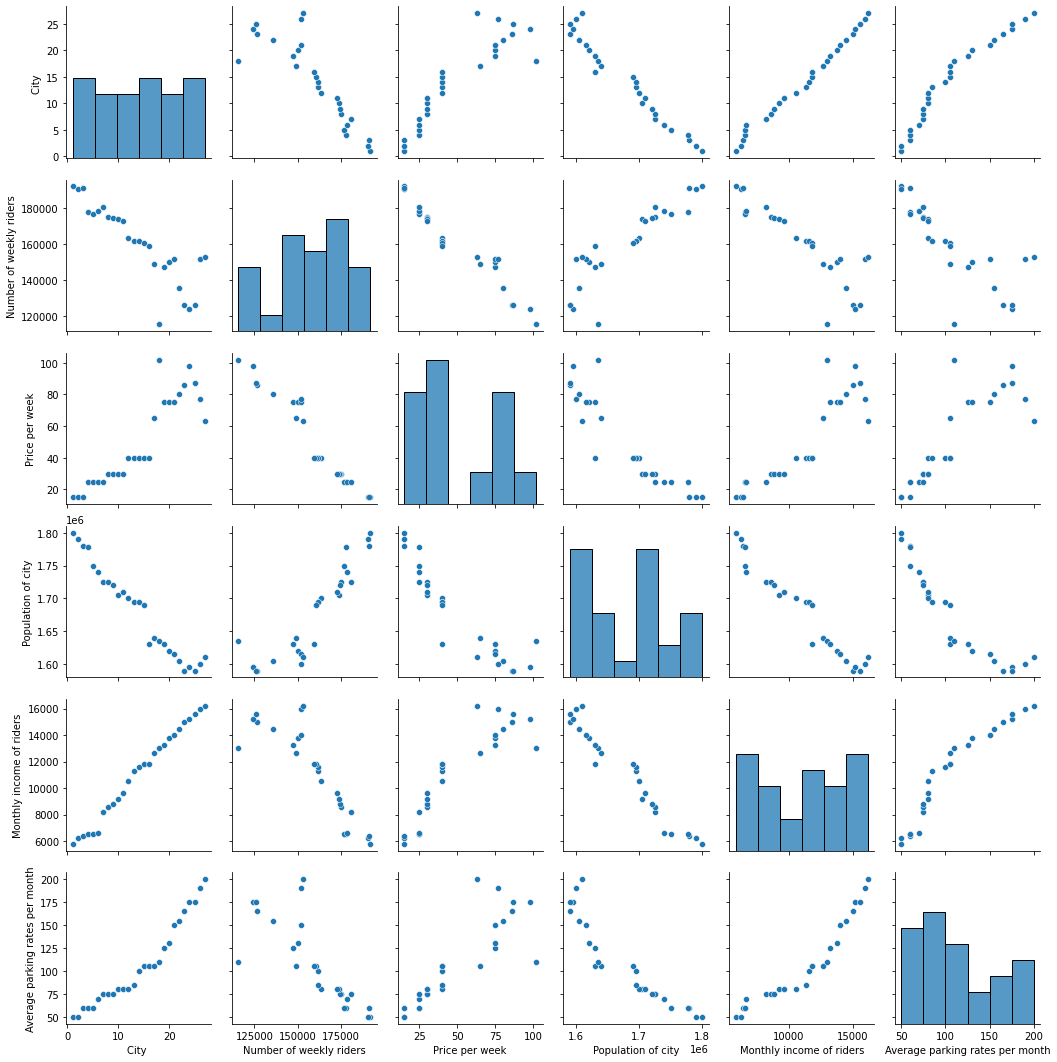

In [ ]:
# Visualising relation among features
sns.pairplot(data)

In [ ]:
# Splitting Target data from dataset
ind = data['Number of weekly riders']
data.drop(columns='Number of weekly riders',inplace=True)

In [ ]:
data.head(10)

,City,Price per week,Population of city,Monthly income of riders,Average parking rates per month
0,1,15,1800000,5800,50
1,2,15,1790000,6200,50
2,3,15,1780000,6400,60
3,4,25,1778000,6500,60
4,5,25,1750000,6550,60
5,6,25,1740000,6580,70
6,7,25,1725000,8200,75
7,8,30,1725000,8600,75
8,9,30,1720000,8800,75
9,10,30,1705000,9200,80


In [ ]:
corr = data.corr()

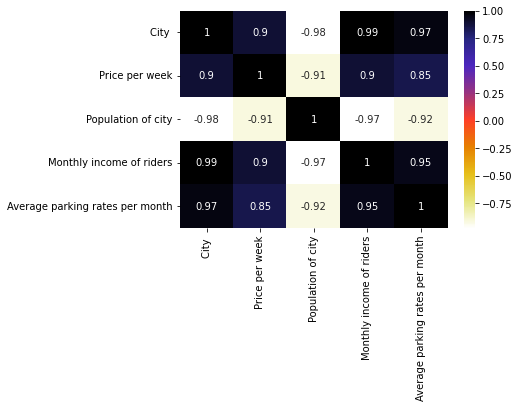

In [ ]:
# plotting co-relation
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
data.drop('City ',axis=1,inplace= True)

In [ ]:
# Standardise data
scaler = StandardScaler()
data = scaler.fit_transform(data)

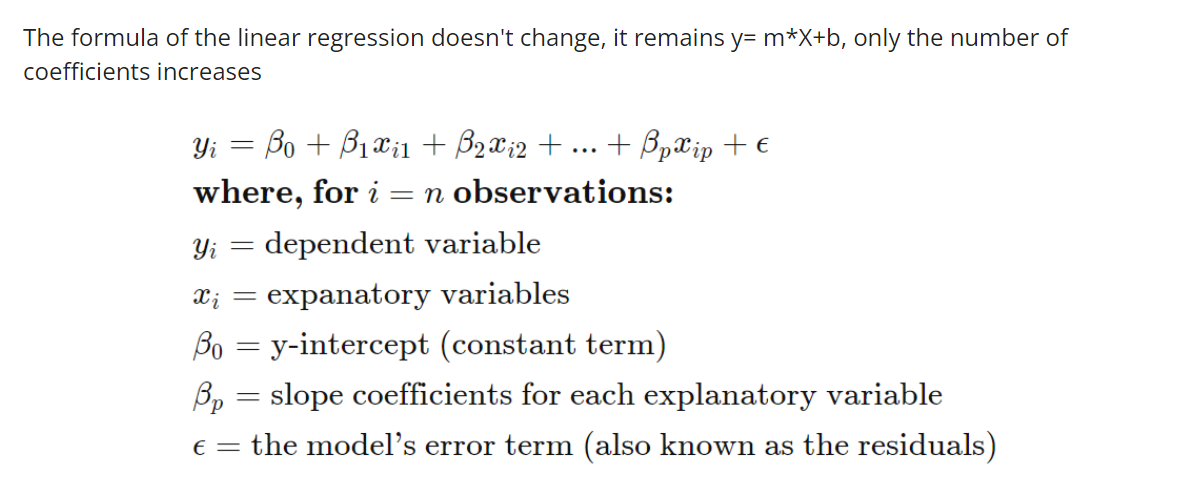

In [ ]:
data.shape

(27, 4)

In [ ]:
Y = pd.DataFrame.to_numpy(ind)

In [ ]:
Y.shape

(27,)

In [ ]:
Y = Y.reshape((27,1))

In [ ]:
Y.shape # Dependent variable , here Number of weekly riders

(27, 1)

In [ ]:
X= data # independent varibles/features

In [ ]:
X.shape

(27, 4)

In [ ]:
# Creating a vector of one's
O = np.ones((27,1))

In [ ]:
# Concatenating one's vector with A vector
A = np.concatenate((X,O),axis=1)

In [ ]:
A.shape

(27, 5)

In [ ]:
# creating A Transpose
AT = np.transpose(A)

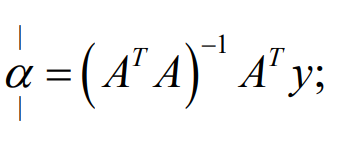

In [ ]:
# co-efficient vector (slope & intercept)
alpha = np.matmul((np.matmul(np.linalg.inv(np.matmul(AT,A)),AT)),Y)

In [ ]:
alpha.shape

(5, 1)

In [ ]:
# ycap is the projected vector of Y in the column space of A
ycap = np.matmul(A,alpha)  # predicted values

In [ ]:
ycap.shape

(27, 1)

In [ ]:
Y

array([[192000],
       [190400],
       [191200],
       [177600],
       [176800],
       [178400],
       [180800],
       [175200],
       [174400],
       [173920],
       [172800],
       [163200],
       [161600],
       [161600],
       [160800],
       [159200],
       [148800],
       [115696],
       [147200],
       [150400],
       [152000],
       [136000],
       [126240],
       [123888],
       [126080],
       [151680],
       [152800]])

In [ ]:
# Compare values of ycap with y
ycap

array([[188848.91437412],
       [187778.95482738],
       [188493.8323266 ],
       [181358.58585173],
       [179755.16166813],
       [180691.27153467],
       [178521.21984697],
       [174553.05948624],
       [174018.07971287],
       [173435.69560241],
       [173150.81424983],
       [164482.88936695],
       [163981.42598461],
       [165916.90243959],
       [166144.20450254],
       [162808.68669595],
       [145052.91059497],
       [119572.66688362],
       [139910.41333053],
       [139417.94152506],
       [141874.82895484],
       [138044.05835207],
       [133915.03931462],
       [127179.76334016],
       [133969.26014448],
       [143180.19893509],
       [154647.22015398]])

In [ ]:
# Importing evaluation metrics for regression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [ ]:
# Evaluation metrics obtained
print('R2_score:')
print(r2_score(y_true=Y,y_pred=ycap)*100)
print('MAE:')
print(mean_absolute_error(y_true=Y,y_pred=ycap))
print('RMSE:')
print(np.sqrt(mean_squared_error(y_true=Y,y_pred=ycap)))

R2_score:
94.54924155314521
MAE:
3919.5518876230367
RMSE:
4880.173208310606
